##### Q.1 Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv("startup_funding.csv")
df.head()
df["CityLocation"].dropna(inplace=True)
# Finding top 10 cities in India 
X=df["CityLocation"]
def name(cityname):
    return cityname.split('/')[0].strip()
df["CityLocation"]=df["CityLocation"].apply(name)
df['CityLocation'].replace('Delhi','New Delhi',inplace=True)
df['CityLocation'].replace('bangalore','Bangalore',inplace=True)
df["CityLocation"].value_counts().head(10)

Bangalore    635
Mumbai       449
New Delhi    389
Gurgaon      241
Pune          91
Noida         79
Hyderabad     77
Chennai       67
Ahmedabad     35
Jaipur        25
Name: CityLocation, dtype: int64

In [75]:
#Narrowing down to the 3 specified places
li=["Bangalore","Mumbai","NCR"]
d={}
#COUNT FOR BANGALORE
for i in li:
    if i=="NCR":
        value= ((df["CityLocation"]=="New Delhi") | (df["CityLocation"]=="Gurgaon") | (df["CityLocation"]=="Noida")).sum()
        d[i]=d.get(i,0)+value
    else:
        value=(df["CityLocation"]==i).sum()
        d[i]=d.get(i,0)+value
print(d)

{'Bangalore': 635, 'Mumbai': 449, 'NCR': 709}


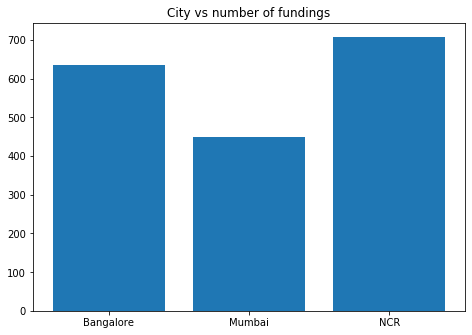

In [76]:
#Plotting the graph
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([1,0,1,1])
ax.set_title('City vs number of fundings')
ax.bar(d.keys(),d.values())
plt.show()

In [77]:
#maximum number of funding
maximum=max(d.values())
for i in d:
    if d[i]==maximum:
        print(i,d[i])

NCR 709


##### Q2.Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

In [102]:
# reading the data
df= pd.read_csv("startup_funding.csv")

df["StartupName"].replace("Ola Cabs","Ola",inplace= True)
df["StartupName"].replace("Olacabs","Ola",inplace= True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace=True)
df["StartupName"].replace("Flipkart.com","Flipkart",inplace=True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace=True)
df["StartupName"].replace("Oyorooms","Oyo",inplace=True)
df["StartupName"].replace("OyoRooms","Oyo",inplace=True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace=True)
df["AmountInUSD"].fillna("0",inplace=True)
#converting into  numerical values
def num_1(value):
    if value!="":
        return int(float(value.replace(',', '')))
df["AmountInUSD"]=df["AmountInUSD"].apply(num_1)
df["InvestorsName"].dropna(inplace=True)

d={}
def name(val):
    arr= val.split(",")
    for i in arr:
        key=i.strip()
        d[key]=d.get(key,0)+1
    
df["InvestorsName"].apply(name)


name=[]
value=[]
for key in d:
    name.append(key)
    value.append(d[key])
# array of the names and values
np_values=np.array(value)
np_names=np.array(name)

#in descending order
X=np_values.argsort()[::-1][:5]
for i in X:
    print(np_names[i],np_values[i])

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


##### Q3 After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.


In [107]:
df= pd.read_csv("startup_funding.csv")
#correcting the wrong names 
df["StartupName"].replace("Ola Cabs","Ola",inplace= True)
df["StartupName"].replace("Olacabs","Ola",inplace= True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace=True)
df["StartupName"].replace("Flipkart.com","Flipkart",inplace=True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace=True)
df["StartupName"].replace("Oyorooms","Oyo",inplace=True)
df["StartupName"].replace("OyoRooms","Oyo",inplace=True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace=True)
df["AmountInUSD"].fillna("0",inplace=True)
df.dropna(subset = ["StartupName","InvestorsName"],inplace = True)  #removing row's having nan's in Investors name and startupnames columns..

In [108]:
# a dictionary to hold the keys as investor name and values as a set of all the startups invested in
d={}
for i in df.index:
    investor_name=df["InvestorsName"][i].strip()
    if "," in investor_name:
        arr_name=investor_name.strip().split(",")
        for j in arr_name:#removing spaces before and after the name
            if j.strip() in d:
                d[j.strip()].add(df["StartupName"][i].strip())
            else:
                s=set()
                d[j.strip()]=s   
                d[j.strip()].add(df["StartupName"][i].strip())
            
            
    else:
        stripped=investor_name.strip()
        if stripped in d: 
            d[stripped].add((df["StartupName"][i].strip()))
        else:
            s=set()
            d[stripped]=s  
            d[stripped].add(df["StartupName"][i].strip())
            
#making another dictionary to keep a count of the number of startups each investor invested in
d1={}
for i in d:
    if i=="":
        continue
    d1[i]=len(d[i])
    
#to get the top 5 values in dictionary of investors
#sorted
d2= sorted(d1,key=d1.get,reverse=True)

for i in d2[:5]:
    print(i,d1[i])


Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


##### Q4 Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_csv("startup_funding.csv")
df["AmountInUSD"].fillna("0",inplace=True)
def num_1(value):
    if value!="":
        return int(float(value.replace(',', '')))
df["AmountInUSD"]=df["AmountInUSD"].apply(num_1)
#correcting the investment typo errors
df["InvestmentType"].replace('SeedFunding','Seed Funding',inplace=True)
df["InvestmentType"].replace('PrivateEquity','Private Equity',inplace=True)
df["InvestmentType"].replace('Crowd funding','Crowd Funding',inplace=True)
#correcting the Startup names typo errors
df["StartupName"].replace("Ola Cabs","Ola",inplace= True)
df["StartupName"].replace("Olacabs","Ola",inplace= True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace=True)
df["StartupName"].replace("Flipkart.com","Flipkart",inplace=True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace=True)
df["StartupName"].replace("Oyorooms","Oyo",inplace=True)
df["StartupName"].replace("OyoRooms","Oyo",inplace=True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace=True)
df["AmountInUSD"].fillna("0",inplace=True)
#TAKING CARE OF THE NA VALUES:
df.dropna(subset = ["StartupName","InvestorsName","InvestmentType"],inplace = True)
df_copy= df.copy()
#limiting only to seed funding and crowd funding
condition= (df_copy["InvestmentType"]=="Crowdfunding") | (df_copy["InvestmentType"]=='Seed Funding')
df_copy=df_copy[condition]


In [131]:
# a dictionary to hold the keys as investor name and values as a set of all the startups invested in
d={}
for i in df_copy.index:
    investor_name=df["InvestorsName"][i].strip()
    if "," in investor_name:
        arr_name=investor_name.strip().split(",")
        for j in arr_name:#removing spaces before and after the name
            if j.strip() in d:
                d[j.strip()].add(df["StartupName"][i].strip())
            else:
                s=set()
                d[j.strip()]=s   
                d[j.strip()].add(df["StartupName"][i].strip())
            
            
    else:
        stripped=investor_name.strip()
        if stripped in d: 
            d[stripped].add((df["StartupName"][i].strip()))
        else:
            s=set()
            d[stripped]=s  
            d[stripped].add(df["StartupName"][i].strip())
            
#making another dictionary to keep a count of the number of startups each investor invested in
d1={}
for i in d:
    if i=="":
        continue
    d1[i]=len(d[i])
    


del d1["Undisclosed Investors"]
del d1["Undisclosed investors"]
#to get the top 5 values in dictionary of investors
#Sorting the dictionary in reverse order 
d2= sorted(d1,key=d1.get,reverse=True)

for i in d2[:5]:
    print(i,d1[i])


Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14


##### Q5  Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_csv("startup_funding.csv")
df["AmountInUSD"].fillna("0",inplace=True)
def num_1(value):
    if value!="":
        return int(float(value.replace(',', '')))
df["AmountInUSD"]=df["AmountInUSD"].apply(num_1)
#correcting the investment typo errors
df["InvestmentType"].replace('SeedFunding','Seed Funding',inplace=True)
df["InvestmentType"].replace('PrivateEquity','Private Equity',inplace=True)
df["InvestmentType"].replace('Crowd funding','Crowd Funding',inplace=True)
#correcting the Startup names typo errors
df["StartupName"].replace("Ola Cabs","Ola",inplace= True)
df["StartupName"].replace("Olacabs","Ola",inplace= True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace=True)
df["StartupName"].replace("Flipkart.com","Flipkart",inplace=True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace=True)
df["StartupName"].replace("Oyorooms","Oyo",inplace=True)
df["StartupName"].replace("OyoRooms","Oyo",inplace=True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace=True)
df["AmountInUSD"].fillna("0",inplace=True)
#TAKING CARE OF THE NA VALUES:
df.dropna(subset = ["StartupName","InvestorsName","InvestmentType"],inplace = True)
df_copy= df.copy()
#limiting only to seed funding and crowd funding
condition= (df_copy["InvestmentType"]=="Private Equity") 
df_copy=df_copy[condition]


In [134]:
# a dictionary to hold the keys as investor name and values as a set of all the startups invested in
d={}
for i in df_copy.index:
    investor_name=df["InvestorsName"][i].strip()
    if "," in investor_name:
        arr_name=investor_name.strip().split(",")
        for j in arr_name:#removing spaces before and after the name
            if j.strip() in d:
                d[j.strip()].add(df["StartupName"][i].strip())
            else:
                s=set()
                d[j.strip()]=s   
                d[j.strip()].add(df["StartupName"][i].strip())
            
            
    else:
        stripped=investor_name.strip()
        if stripped in d: 
            d[stripped].add((df["StartupName"][i].strip()))
        else:
            s=set()
            d[stripped]=s  
            d[stripped].add(df["StartupName"][i].strip())
            
#making another dictionary to keep a count of the number of startups each investor invested in
d1={}
for i in d:
    if i=="":
        continue
    d1[i]=len(d[i])
    


del d1["Undisclosed Investors"]
del d1["Undisclosed investors"]
#to get the top 5 values in dictionary of investors
#Sorting the dictionary in reverse order 
d2= sorted(d1,key=d1.get,reverse=True)

for i in d2[:5]:
    print(i,d1[i])


Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24
